In [1]:
# Lo primero es  instalar las bibliotecas
# en el entorno de anaconda colocar
## conda install -c conda-forge mechanicalsoup
## pip install wget

# llamamos a la boblioteca
import mechanicalsoup

# creamos un objeto (a partir de ahora, browser funcionara como nuestro navegador)
browser = mechanicalsoup.StatefulBrowser()
url = 'https://www.google.com/imghp?hl=es'

browser.open(url)
print(browser.get_url())



https://www.google.com/imghp?hl=es


In [2]:
# para extraer el codigo de fuente de la pagina web
browser.get_current_page()

<!DOCTYPE html>
<html itemscope="" itemtype="http://schema.org/WebPage" lang="es-CL"><head><meta content="Imágenes de Google. La búsqueda de imágenes más integral de Internet." name="description"/><meta content="text/html; charset=utf-8" http-equiv="Content-Type"/><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"/><title>Imágenes de Google</title><script nonce="69be6dk0GQER4UmrX+9IcQ==">(function(){window.google={kEI:'eiTjYKCKFO6l5OUP8smi6A4',kEXPI:'0,772215,1,530320,56873,954,5105,206,2414,2390,2316,383,246,5,1354,5250,16232,10,1106274,1197758,525,82,6,328896,51223,16115,19397,9287,17572,4858,1362,9291,3021,17587,4020,978,13226,3849,4192,6430,12724,1804,4517,2777,919,5081,1593,1279,2212,530,149,1103,840,6297,108,3406,606,2023,1777,520,14670,3227,2845,7,5599,6755,5096,7876,5037,2854,553,908,2,941,2614,13142,3,576,6459,149,12314,1661,4,1528,2304,1236,5226,577,4684,2014,4067,2506,7038,2726,2038,2658,4243,2458,656,30,5664,5748,2216,2305,638,1494

In [3]:
# Luego, para buscar los campos rellenables de la pagina, es que debemos ejecutar lo siguiente
browser.select_form()
browser.get_current_form().print_summary()

<input name="tbm" type="hidden" value="isch"/>
<input name="ie" type="hidden" value="ISO-8859-1"/>
<input name="hl" type="hidden" value="es-CL"/>
<input name="source" type="hidden" value="hp"/>
<input name="biw" type="hidden"/>
<input name="bih" type="hidden"/>
<input autocomplete="off" class="lst" maxlength="2048" name="q" size="57" style="margin:0;padding:5px 8px 0 6px;vertical-align:top;color:#000" title="Imágenes de búsqueda" value=""/>
<input class="lsb" name="btnG" type="submit" value="Imágenes de búsqueda"/>
<input id="gbv" name="gbv" type="hidden" value="1"/>


## Para verificar que estemos seleccionando el campo correcto de la pagina, podemos abrir el navegador y en la pagina web ponernos a inspaeccionar.
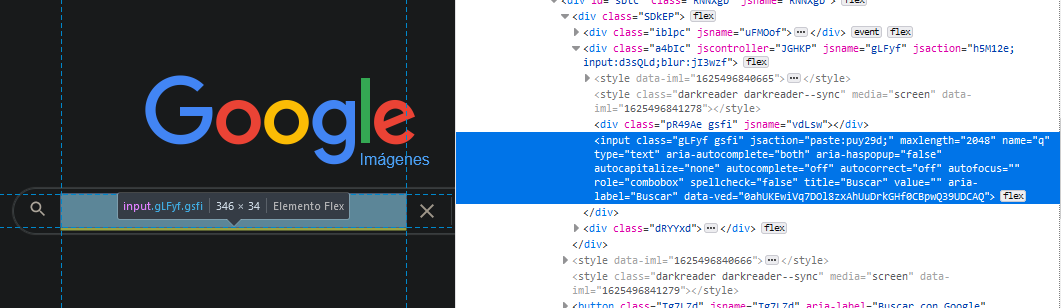

Por ultimo, chequeamos que tengan los mismos nombres.


In [4]:
# ahora seleccionamos este campo
search_term = 'dog'
browser['q'] = search_term # equivalente a escribir cat en este campo

# para hacer click
browser.launch_browser()
response = browser.submit_selected()

print('new url: ', browser.get_url())
print('my response: \n', response.text[:500])



new url:  https://www.google.com/search?tbm=isch&ie=ISO-8859-1&hl=es-CL&source=hp&biw=&bih=&q=dog&btnG=Im%C3%A1genes+de+b%C3%BAsqueda&gbv=1
my response: 
 <!DOCTYPE html PUBLIC "-//WAPFORUM//DTD XHTML Mobile 1.0//EN" "http://www.wapforum.org/DTD/xhtml-mobile10.dtd"><html xmlns="http://www.w3.org/1999/xhtml" lang="es-419"><head><meta content="application/xhtml+xml; charset=UTF-8" http-equiv="Content-Type"/><meta content="no-cache" name="Cache-Control"/><title>dog - Buscar con Google</title><style>a{text-decoration:none;color:inherit}a:hover{text-decoration:underline}a img{border:0}body{font-family:Roboto,Helvetica,Arial,sans-serif;padding:8px;margi


In [5]:
# ahora para seleccionar todas las imagenes
new_url = browser.get_url()
browser.open(new_url)

# obtener html
page = browser.get_current_page()
all_images = page.find_all('img')

all_images

[<img alt="Google" class="kgJEQe" src="/images/branding/searchlogo/1x/googlelogo_desk_heirloom_color_150x55dp.gif"/>,
 <img alt="" class="t0fcAb" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQbtphiBDui0I9_pY_kg9ajW8GZf5dVql_StbxbPCRDwXLzw2vCoGHxSt2yUQ&amp;s"/>,
 <img alt="" class="t0fcAb" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRm86TMc3Hj0WlqvGmTQUMD8sRhnWssK7v3DACPstcfzordF3emk2y7tFUDpA&amp;s"/>,
 <img alt="" class="t0fcAb" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSf1JeNvMKeK53G9H4LvaM3x2-kiOcEN8LEPJrbqcwkUlqc36h-BAnXQy-oUrw&amp;s"/>,
 <img alt="" class="t0fcAb" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSVSWl6u63Cze8CF7p5PKRrnz9TqubMbxrWA1znrFqnxxWPWqX0dAUV8-Ldug&amp;s"/>,
 <img alt="" class="t0fcAb" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQydm3EJAs0TIdohAF3OW1ixQtfNxSFV1xHVWJ8hebpuxLbBV8M1qNTjEUiWLw&amp;s"/>,
 <img alt="" class="t0fcAb" src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSdE

In [6]:
# Ahora, para solo seleccionar la fuente (src)
image_source = []
for image in all_images:
    image = image.get('src')
    image_source.append(image)
image_source


['/images/branding/searchlogo/1x/googlelogo_desk_heirloom_color_150x55dp.gif',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQbtphiBDui0I9_pY_kg9ajW8GZf5dVql_StbxbPCRDwXLzw2vCoGHxSt2yUQ&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRm86TMc3Hj0WlqvGmTQUMD8sRhnWssK7v3DACPstcfzordF3emk2y7tFUDpA&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSf1JeNvMKeK53G9H4LvaM3x2-kiOcEN8LEPJrbqcwkUlqc36h-BAnXQy-oUrw&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSVSWl6u63Cze8CF7p5PKRrnz9TqubMbxrWA1znrFqnxxWPWqX0dAUV8-Ldug&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQydm3EJAs0TIdohAF3OW1ixQtfNxSFV1xHVWJ8hebpuxLbBV8M1qNTjEUiWLw&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSdEZg1wlVQUPxnZhITh70ZYcssMXMFDa-6i0SsXz48EC0oVT5QwTVAEZz-Yg&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTagma-A-PkMPXrzZbn5akRb2lTiiBJSRRHDkDEgtKrddZbNAxXwpTGwXLvwD8&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR-x8ukkG7lIySFq

In [7]:
# ahora, para dejar solo las fuentes de las paginas confiables (https)
image_source = [image for image in image_source if image[:5] == 'https']
image_source

['https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQbtphiBDui0I9_pY_kg9ajW8GZf5dVql_StbxbPCRDwXLzw2vCoGHxSt2yUQ&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRm86TMc3Hj0WlqvGmTQUMD8sRhnWssK7v3DACPstcfzordF3emk2y7tFUDpA&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSf1JeNvMKeK53G9H4LvaM3x2-kiOcEN8LEPJrbqcwkUlqc36h-BAnXQy-oUrw&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSVSWl6u63Cze8CF7p5PKRrnz9TqubMbxrWA1znrFqnxxWPWqX0dAUV8-Ldug&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcQydm3EJAs0TIdohAF3OW1ixQtfNxSFV1xHVWJ8hebpuxLbBV8M1qNTjEUiWLw&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSdEZg1wlVQUPxnZhITh70ZYcssMXMFDa-6i0SsXz48EC0oVT5QwTVAEZz-Yg&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTagma-A-PkMPXrzZbn5akRb2lTiiBJSRRHDkDEgtKrddZbNAxXwpTGwXLvwD8&s',
 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR-x8ukkG7lIySFqw1RWHggnjr8oxBtbyqWzx4foEHNWY0nnUVB6_6O7mq2JA&s',
 'https://encrypted-tbn0.gsta

In [8]:
# ahora vamos a empezar a guardar los archivos
# para crear una nueva carpeta
import os
import wget

# para obtener la direccion actual
path = os.getcwd()

# para crear la nueva carpeta
path = os.path.join(path, search_term + 's')
os.mkdir(path)


In [9]:
# ahora, para descargar las imagenes
for counter, image in enumerate(image_source):
    save_as = os.path.join(path, search_term + str(counter) + '.jpg')
    wget.download(image, save_as)
    

100% [............................................................] 4146 / 4146